## Char-RNN (prediction)

This notebook describes the use of a char-RNN.

The notebook has been apoted from: https://github.com/mineshmathew/char_rnn_karpathy_keras/blob/master/char_rnn_of_karpathy_keras.py

The training is described in [15_char_rnn_didactic_no_state_training.ipynb](https://github.com/tensorchiefs/dl_course/blob/master/notebooks/15_char_rnn_didactic_no_state_training.ipynb).

In [1]:
from __future__ import print_function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM,SimpleRNN
from tensorflow.keras.layers import TimeDistributed
#from tensorflow.keras.utils.data_utils import get_file
import numpy as np
from time import sleep
import tensorflow as tf
import random
import sys
import pickle

In [2]:
char_indices, indices_char = pickle.load( open( "15_chars.p", "rb" ) )

In [3]:
len(char_indices)

106

In [4]:
# Loading the model
import urllib
import os
if not os.path.isfile('Didactic_no_state'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/ibs345wdjtxuy1t/Didactic_no_state?dl=1","Didactic_no_state")
%ls -hl Didactic_no_state

-rw-r--r-- 1 root root 27M Dec 17 21:19 Didactic_no_state


In [5]:
model = tf.keras.models.load_model('Didactic_no_state')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 512)           1267712   
_________________________________________________________________
lstm_2 (LSTM)                (None, 40, 512)           2099200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 512)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 40, 106)           54378     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 40, 106)           0         
Total params: 3,421,290
Trainable params: 3,421,290
Non-trainable params: 0
_________________________________________________________________


In [6]:
def get_coded_sequence(sentence):
    maxlen = 40
    x = np.zeros((1, maxlen, len(char_indices))) #One hot encoding
    for t, char in enumerate(sentence):  
        x[0, t, char_indices[char]] = 1.
    return x

In [7]:
sentence = 'Zur Didaktik des integrativen Unterricht'
get_coded_sequence(sentence).shape #(1, 40, 106) batch, time_steps, characters

(1, 40, 106)

In [8]:
def temp_scaling(probs, temperature=0.5):
    logit = np.log(probs) 
    s = np.exp(logit / temperature)
    return s/np.sum(s)

def _sample(probs, temperature):
    # helper function to sample an index from a probability array
    p = temp_scaling(probs)
    #1.001 to be on the save side, sum(p) < 1 for np.random.multinomial
    p /= (1.001 * np.sum(p))
    return np.argmax(np.random.multinomial(1, p, 1))

def print_sample(sentence = 'Zur Didaktik des integrativen Unterricht', num=100, temp=0.5):
    """
        sentence : should be 40 characters long
    """
    generated = ''
    start_index = 0
    generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)

    for i in range(num):
        x = get_coded_sequence(sentence)
        probs = (model.predict_proba(x, verbose=0))[0,-1,:] #Probabilities for next charcter
        #print(preds)
        next_index = _sample(probs, temp) 
        next_char = indices_char[next_index] #next character

        generated += next_char
        sentence = sentence[1:] + next_char

        #print(next_index)
        sys.stdout.write(next_char)
        sys.stdout.flush()

print()

In [9]:
print_sample(num = 200)

----- Generating with seed: "Zur Didaktik des integrativen Unterricht"
Zur Didaktik des integrativen Unterrichts
„Und ich probiere immer auch herum auf eine gemeins

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


ame Struktur geschaffen werden kann, ihre Unterrichtserfolge in der Formulierung einer Theorie des Unterrichts. Diese beginnt damit, dass sie sich 

#### Some samples 

We started with "Zur Didaktik des integrativen Unterricht" and temp=1/2

```
Zur Didaktik des integrativen Unterrichts
„Das bedeutet auch die Begriffe Heterogenität und deine Vorstellung der Didaktik im integrativen Unter

Zur Didaktik des integrativen Unterrichts
Frontalunterricht miteinander oder wir haben auch Kreisgespräche innerhalb einer Unterrichtseinheit eingesetzt werden

Zur Didaktik des integrativen Unterrichts
Die Sachbegegnung soll dabei nicht nur auf Hören und Sehen beschränkt werden, „sondern in der Motorik, im handelnden Unterrichtsstil gefunden hat, der in optivieren der Ergebnisse bewusst ist.

```

### The Effect of Temperatur Scaling

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


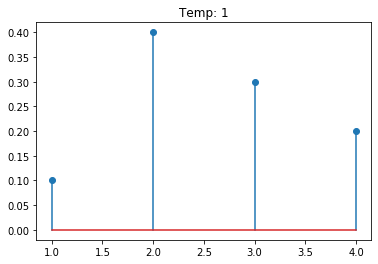

array([0.1, 0.4, 0.3, 0.2])

In [10]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

T = 1 #Change to see effect
p = np.array((0.1,0.4,0.3,0.2))

plt.stem((1,2,3,4),temp_scaling(p,T))
plt.title('Temp: {}'.format(T))
plt.show()
temp_scaling(p,T)